# ML Classifier Copies (v0)

In [70]:
import sys
import os

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import make_blobs

## Original dataset

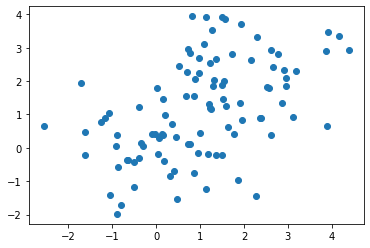

In [155]:
X, y = make_blobs(n_samples=100, centers=[(0,0), (2,2)], n_features=2, random_state=0)

plt.scatter(X[:,0],X[:,1])

## Fit classifier

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Score of trained SVC classifier: 0.9

Classification report: 

               precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.78      1.00      0.88         7

    accuracy                           0.90        20
   macro avg       0.89      0.92      0.90        20
weighted avg       0.92      0.90      0.90        20



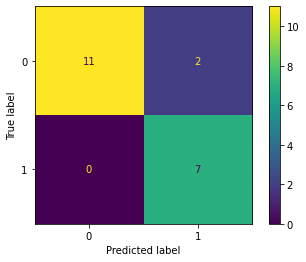

In [156]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# SVC classifier
classifier = SVC(kernel='linear', decision_function_shape='ovo')
print(classifier)

classifier.fit(X_train, y_train)
y_predicted = classifier.predict(X_test)

score = classifier.score(X_test, y_test)
print(f"\nScore of trained SVC classifier: {score}")
plot_confusion_matrix(classifier, X_test, y_test)
print(f"\nClassification report: \n\n", classification_report(y_test, y_predicted))

## Feature ranges

In [158]:
print( X[:,0].min(), X[:,0].max() , X[:,0].max()- X[:,0].min())
print( X[:,1].min(), X[:,1].max() , X[:,1].max()- X[:,1].min())

-2.5529898158340787 4.383144774863942 6.93613459069802
-1.980796468223927 3.9436211856492926 5.92441765387322


## Generate uniform distribution

In [238]:
X0_generated = np.linspace(X[:,0].min(), X[:,0].max(), 10)
X1_generated = np.linspace(X[:,1].min(), X[:,1].max(), 10)
X_generated = np.empty((2,))
for num0 in X0_generated:
    for num1 in X1_generated:
        point_coord = np.array([num0, num1])
        X_generated = np.vstack( [X_generated, point_coord ] )

## Label synthetic data with original classifier

In [240]:
y_generated = classifier.predict(X_generated)

In [243]:
y_generated

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Copy classifier with synthetic data

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Score of trained SVC classifier: 0.9

Classification report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         9

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



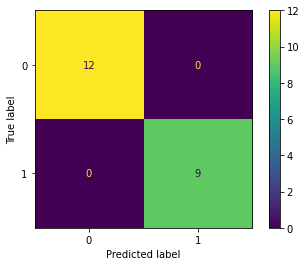

In [245]:
# Train/test split
X_gen_train, X_gen_test, y_gen_train, y_gen_test = train_test_split(X_generated, y_generated, test_size=0.20, 
                                                                    random_state=0)

# SVC classifier copy
classifier_copy = SVC(kernel='linear', decision_function_shape='ovo')
print(classifier_copy)

classifier_copy.fit(X_gen_train, y_gen_train)
y_gen_predicted = classifier_copy.predict(X_gen_test)

score_copy = classifier_copy.score(X_gen_test, y_gen_test)
print(f"\nScore of trained SVC classifier: {score}")
plot_confusion_matrix(classifier_copy, X_gen_test, y_gen_test)
print(f"\nClassification report: \n\n", classification_report(y_gen_test, y_gen_predicted))